# Flight Delay Analysis

I'm only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

In [138]:
# USUAL SUSPECTS
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency

In [ ]:
flights = pd.read_csv("/content/flights.csv",low_memory=False)
flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,361,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,N13538,4112,EWR,ALB,33.0,143,13.0,15.0
1,570,2013,1,1,1655.0,34.0,1804.0,40.0,EV,N19554,3260,EWR,ALB,36.0,143,16.0,55.0
2,785,2013,1,1,2056.0,52.0,2156.0,44.0,EV,N12540,4170,EWR,ALB,31.0,143,20.0,56.0
3,1280,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,N14153,4316,EWR,ALB,33.0,143,13.0,32.0
4,1537,2013,1,2,1746.0,85.0,1835.0,71.0,EV,N14153,3260,EWR,ALB,31.0,143,17.0,46.0


In [ ]:
flights.shape

(145735, 17)

In [ ]:
flights.dtypes

Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object

In [ ]:
flights.size

2477495

In [ ]:
flights.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [ ]:
flights.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    164838.686246
year            2013.000000
month              6.485155
day               15.656829
dep_time        1349.452221
dep_delay         12.262463
arr_time        1488.127387
arr_delay          6.964704
flight          1964.570289
air_time         144.071970
distance         985.469208
hour              13.169447
minute            32.507497
dtype: float64

In [ ]:
flights.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0       1
year          2013
month            1
day              1
dep_time       1.0
dep_delay    -43.0
arr_time       1.0
arr_delay    -75.0
carrier         9E
flight           1
origin         EWR
dest           ABQ
air_time      20.0
distance       116
hour           0.0
minute         0.0
dtype: object

In [ ]:
flights.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    336774
year            2013
month             12
day               31
dep_time      2400.0
dep_delay     1301.0
arr_time      2400.0
arr_delay     1272.0
carrier           YV
flight          6181
origin           LGA
dest             LAX
air_time       695.0
distance        4983
hour            24.0
minute          59.0
dtype: object

In [ ]:
flights.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    9.264498e+09
year          0.000000e+00
month         1.187944e+01
day           7.657959e+01
dep_time      2.393866e+05
dep_delay     1.588120e+03
arr_time      2.874572e+05
arr_delay     1.940318e+03
flight        2.633443e+06
air_time      9.751895e+03
distance      5.932366e+05
hour          2.408579e+01
minute        3.408185e+02
dtype: float64

In [ ]:
flights.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    96252.262056
year              0.000000
month             3.446656
day               8.750976
dep_time        489.271531
dep_delay        39.851227
arr_time        536.150348
arr_delay        44.049040
flight         1622.788629
air_time         98.751683
distance        770.218560
hour              4.907728
minute           18.461271
dtype: float64

In [ ]:
flights.describe()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,145735.000000,145735.0,145735.000000,145735.000000,141997.000000,141997.000000,141788.000000,141490.000000,145735.000000,141490.000000,145735.000000,141997.000000,141997.000000
mean,164838.686246,2013.0,6.485155,15.656829,1349.452221,12.262463,1488.127387,6.964704,1964.570289,144.071970,985.469208,13.169447,32.507497
std,96252.262056,0.0,3.446656,8.750976,489.271531,39.851227,536.150348,44.049040,1622.788629,98.751683,770.218560,4.907728,18.461271
min,1.000000,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-75.000000,1.000000,20.000000,116.000000,0.000000,0.000000
25%,81463.000000,2013.0,4.000000,8.000000,918.000000,-5.000000,1106.000000,-16.000000,619.000000,54.000000,282.000000,9.000000,17.000000
50%,163869.000000,2013.0,6.000000,16.000000,1352.000000,-2.000000,1521.000000,-5.000000,1494.000000,116.000000,762.000000,13.000000,33.000000
75%,246391.000000,2013.0,10.000000,23.000000,1739.000000,10.000000,1931.000000,14.000000,3357.000000,203.000000,1400.000000,17.000000,51.000000
max,336774.000000,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,6181.000000,695.000000,4983.000000,24.000000,59.000000


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145735 entries, 0 to 145734
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  145735 non-null  int64  
 1   year        145735 non-null  int64  
 2   month       145735 non-null  int64  
 3   day         145735 non-null  int64  
 4   dep_time    141997 non-null  float64
 5   dep_delay   141997 non-null  float64
 6   arr_time    141788 non-null  float64
 7   arr_delay   141490 non-null  float64
 8   carrier     145735 non-null  object 
 9   tailnum     144495 non-null  object 
 10  flight      145735 non-null  int64  
 11  origin      145735 non-null  object 
 12  dest        145735 non-null  object 
 13  air_time    141490 non-null  float64
 14  distance    145735 non-null  int64  
 15  hour        141997 non-null  float64
 16  minute      141997 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 18.9+ MB


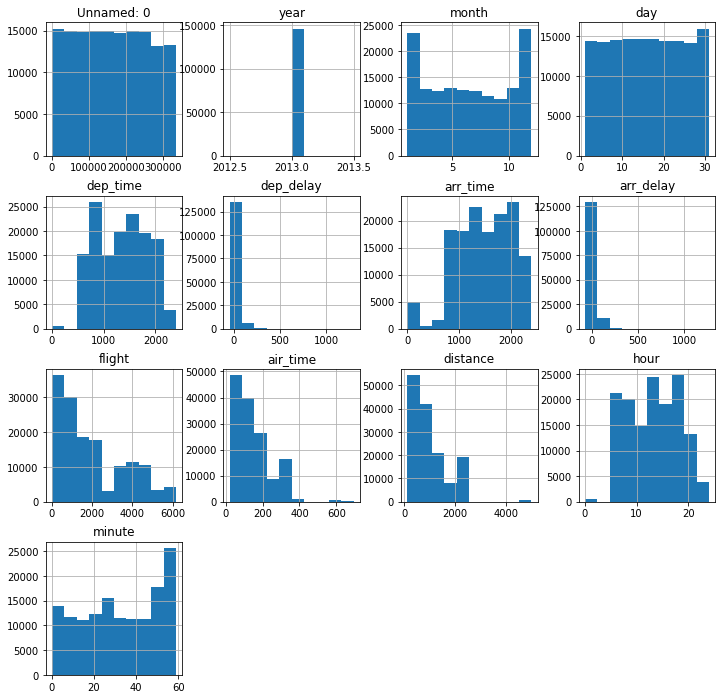

In [ ]:
import matplotlib.pyplot as plt
flights.hist(figsize=(12,12))
plt.show()

In [ ]:
corr = flights.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
Unnamed: 0,1.000000,nan,0.062769,0.083838,0.002076,0.056617,-0.022971,0.023896,0.028359,-0.095003,-0.051048,0.002547,-0.012703
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,0.062769,nan,1.000000,-0.001757,0.003078,-0.011781,0.006126,-0.006943,0.013252,-0.013039,-0.001912,0.003267,-0.005271
day,0.083838,nan,-0.001757,1.000000,-0.000531,0.002387,-0.006418,0.004745,0.003928,-0.003460,-0.004868,-0.000481,-0.001280
dep_time,0.002076,nan,0.003078,-0.000531,1.000000,0.247734,0.640242,0.220765,0.030958,-0.032290,-0.029751,0.999295,-0.062577
dep_delay,0.056617,nan,-0.011781,0.002387,0.247734,1.000000,0.030241,0.915646,0.049050,-0.020709,-0.018956,0.249970,-0.079600
arr_time,-0.022971,nan,0.006126,-0.006418,0.640242,0.030241,1.000000,0.024680,0.021485,0.032889,0.027058,0.639791,-0.039885
arr_delay,0.023896,nan,-0.006943,0.004745,0.220765,0.915646,0.024680,1.000000,0.064105,-0.031258,-0.055177,0.222942,-0.075763
flight,0.028359,nan,0.013252,0.003928,0.030958,0.049050,0.021485,0.064105,1.000000,-0.487828,-0.496298,0.031027,-0.004362
air_time,-0.095003,nan,-0.013039,-0.003460,-0.032290,-0.020709,0.032889,-0.031258,-0.487828,1.000000,0.991582,-0.030305,-0.050138


In [ ]:
corr.style.background_gradient(cmap='magma')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
Unnamed: 0,1.000000,nan,0.062769,0.083838,0.002076,0.056617,-0.022971,0.023896,0.028359,-0.095003,-0.051048,0.002547,-0.012703
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,0.062769,nan,1.000000,-0.001757,0.003078,-0.011781,0.006126,-0.006943,0.013252,-0.013039,-0.001912,0.003267,-0.005271
day,0.083838,nan,-0.001757,1.000000,-0.000531,0.002387,-0.006418,0.004745,0.003928,-0.003460,-0.004868,-0.000481,-0.001280
dep_time,0.002076,nan,0.003078,-0.000531,1.000000,0.247734,0.640242,0.220765,0.030958,-0.032290,-0.029751,0.999295,-0.062577
dep_delay,0.056617,nan,-0.011781,0.002387,0.247734,1.000000,0.030241,0.915646,0.049050,-0.020709,-0.018956,0.249970,-0.079600
arr_time,-0.022971,nan,0.006126,-0.006418,0.640242,0.030241,1.000000,0.024680,0.021485,0.032889,0.027058,0.639791,-0.039885
arr_delay,0.023896,nan,-0.006943,0.004745,0.220765,0.915646,0.024680,1.000000,0.064105,-0.031258,-0.055177,0.222942,-0.075763
flight,0.028359,nan,0.013252,0.003928,0.030958,0.049050,0.021485,0.064105,1.000000,-0.487828,-0.496298,0.031027,-0.004362
air_time,-0.095003,nan,-0.013039,-0.003460,-0.032290,-0.020709,0.032889,-0.031258,-0.487828,1.000000,0.991582,-0.030305,-0.050138


In [ ]:
airlines = pd.read_csv(r"airlines.csv",low_memory=False)
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [ ]:
airports = pd.read_csv(r"airports.csv",low_memory=False)
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [ ]:
planes = pd.read_csv(r"planes.csv",low_memory=False)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [ ]:
weatherNYhourly = pd.read_csv(r"weatherNYhourly.csv",low_memory=False)
weatherNYhourly.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [ ]:
flights2DCMDVA = pd.read_excel(r"flights2DCMDVA.xlsx")
flights2DCMDVA.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0


In [ ]:
weatherMDdaily = pd.read_excel(r"weatherMDdaily.xlsx")
weatherMDdaily.head()

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,44,34,0,0,0
1,2013-01-02,37,26,0,0,0
2,2013-01-03,38,22,0,0,0
3,2013-01-04,42,23,0,0,0
4,2013-01-05,43,31,T,0,0


In [ ]:
weatherNYdaily = pd.read_excel(r"weatherNYdaily.xlsx")
weatherNYdaily.head()

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,41,27,0,0,0
1,2013-01-02,35,23,0,0,0
2,2013-01-03,33,25,0,0,0
3,2013-01-04,39,30,0,0,0
4,2013-01-05,45,32,0,0,0


In [ ]:
federal_holidays_2013 = pd.read_excel(r"federal-holidays-2013.xlsx")
federal_holidays_2013.head()

,Federal holidays 2013,Unnamed: 1,https://www.calendarpedia.com/
0,Date,Federal holiday,Day of the week
1,"January 1, 2013",New Year's Day,Tuesday
2,"January 21, 2013",Martin Luther King Day,Monday
3,"February 18, 2013",Presidents' Day,Monday
4,"May 27, 2013",Memorial Day,Monday


After carrying out EDA, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer the following questions or complete the tasks <br>

#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately? <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

#### Question/Task 2
a. What day of the year most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>


For the next group of questions/tasks, do not include the cancelled flights.

#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>

#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [ ]:
#Question/Task 1
#a. Calculate the total number of seats for all the planned flights for each destination separately?
df_seats=flights2DCMDVA.merge(planes[['tailnum','seats']],on='tailnum', how='left')

In [ ]:
df_seats

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,140.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,NaN
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,149.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,140.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,55.0
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,55.0
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,80.0
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,55.0


In [ ]:
df_seats_high=df_seats.groupby('dest')['seats'].sum().reset_index()
df_seats_high

,dest,seats
0,BWI,96135.0
1,DCA,906225.0
2,IAD,296004.0


In [ ]:
#b.What is the day of the year with the highest number of flights?
cols=["year","month","day"]
df_seats['date'] = df_seats[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [ ]:
df_day_high=df_seats['date'].value_counts().rename_axis('Date').reset_index(name='No.of.Flights')
df_day_high

,Date,No.of.Flights
0,2013-1-17,61
1,2013-1-11,61
2,2013-1-30,60
3,2013-1-22,60
4,2013-1-23,60
...,...,...
360,2013-12-21,23
361,2013-11-29,23
362,2013-12-28,23
363,2013-12-31,22


So,here 17th January 2013,11th January 2013, has the highest number of flights with count of 61.

In [ ]:
#c. What is the day of the year with the highest number of seats available on that day?
df_day_seats=df_seats.groupby('date')['seats'].sum().reset_index()
df_day_seats.sort_values(by=['seats'],ascending=False)

,date,seats
143,2013-2-28,5379.0
2,2013-1-11,5318.0
28,2013-1-7,5272.0
16,2013-1-24,5268.0
148,2013-2-7,5267.0
...,...,...
83,2013-11-29,1029.0
34,2013-10-12,970.0
108,2013-12-24,924.0
109,2013-12-25,895.0


So,here 28th February 2013 has the highest number of seats with the count of 5379.

In [ ]:
#Question/Task 2
#a. What day of the year most cancellations happened?
df_seats.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'seats', 'date'],
      dtype='object')

In [ ]:
cancel = df_seats['dep_time'].isnull() & df_seats['dep_delay'].isnull() & df_seats['arr_time'].isnull() & df_seats['arr_delay'].isnull() & df_seats['air_time'].isnull() & df_seats['hour'].isnull() & df_seats['minute'].isnull()

In [ ]:
df_cancellations=df_seats[cancel]
df_cancellations

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats,date
136,2013,1,13,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-13
137,2013,1,13,NaN,NaN,NaN,NaN,MQ,N655MQ,3944,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-13
167,2013,1,16,NaN,NaN,NaN,NaN,9E,NaN,3635,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-16
204,2013,1,20,NaN,NaN,NaN,NaN,EV,N16178,4316,EWR,BWI,NaN,169,NaN,NaN,55.0,2013-1-20
213,2013,1,21,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5712,JFK,IAD,NaN,228,NaN,NaN,55.0,2013-12-26
17116,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5736,LGA,IAD,NaN,229,NaN,NaN,55.0,2013-12-26
17147,2013,12,29,NaN,NaN,NaN,NaN,EV,N835AS,5769,LGA,IAD,NaN,229,NaN,NaN,55.0,2013-12-29
17157,2013,12,30,NaN,NaN,NaN,NaN,EV,N832AS,5714,JFK,IAD,NaN,228,NaN,NaN,55.0,2013-12-30


In [ ]:
df_cancellations_count=df_cancellations['date'].value_counts().rename_axis('Date').reset_index(name='No.of.Cancellations')
df_cancellations_count

,Date,No.of.Cancellations
0,2013-3-6,46
1,2013-2-8,33
2,2013-9-12,25
3,2013-3-8,23
4,2013-5-23,21
...,...,...
219,2013-8-6,1
220,2013-8-2,1
221,2013-3-3,1
222,2013-3-11,1


On 6th March 2013,most of the of flights got cancelled with count of 46.

In [102]:
#b. Is there any relationship between the weather datasets and cancellations? 
#If yes, describe it and justify with a statistical model (hypothesis testing).
flights_data=pd.read_excel("/content/flights2DCMDVA.xlsx")

Null Hypothesis: Flight cancellations are affected by weather conditions.

In [104]:
flights_data['air_time'] = flights_data['air_time'].fillna(1)

In [110]:
df_weather_hypo=df_seats.rename(columns={"date": "Date"})

In [114]:
df_weather_hypo['Date']=pd.to_datetime(df_weather_hypo['Date'])

In [115]:
flights_hypothesis = pd.merge(df_weather_hypo, weatherNYdaily, how = 'left', on = 'Date')
flights_hypothesis['cancellation']=flights_hypothesis['dep_time'].apply(lambda x: 1 if math.isnan(x) else 0)

In [126]:
precp_rel = pd.crosstab(flights_hypothesis['air_time']==1, flights_hypothesis['Precipitation'])
print(f"p-value: is {chi2_contingency(precp_rel, correction=True)[1]}")

p-value: is 1.0


In [127]:
snow_rel = pd.crosstab(flights_hypothesis['air_time']==1, flights_hypothesis['Snowfall'])
print(f"p-value: is {chi2_contingency(snow_rel, correction=True)[1]}")

p-value: is 1.0


In each case, p-value is greater than 0.05.So, null hypothesis is true i.e cancellations are affected by weather

In [133]:
#c. Is there any relationship between the Federal Holiday Schedule and cancellations? 
#If yes, describe it and justify with a statistical model (hypothesis testing).
fed_holidays = pd.read_excel('federal-holidays-2013.xlsx', header=1)
fed_holidays=fed_holidays.head(10)
fed_holidays
fed_holidays['Date']=pd.to_datetime(fed_holidays['Date'])
fed_holiday_df=pd.merge(fed_holidays,flights_hypothesis,how='right')
fed_holiday_df=fed_holiday_df.rename(columns = {'Federal holiday':'Federal_holiday', 'Day of the week':'Day_of_the_week'})

In [140]:
fed_holiday_df=fed_holiday_df.fillna(0)
fed_holiday_df.loc[fed_holiday_df.Federal_holiday!=0,'Federal_holiday']=1
pearsonr(fed_holiday_df['Federal_holiday'], fed_holiday_df['cancellation'])
print(f"Pearsons correlation is \033[1m {pearsonr(fed_holiday_df['Federal_holiday'], fed_holiday_df['cancellation'])[1]}\033[0m")

Pearsons correlation is  0.015112590014798463


In [141]:
#d. What is the total number of seats for the cancelled flights? 
#If we assume the average flight price of $50, what is the total economis loss?

print(f"Total number of seats for the cancelled flights: {int(df_cancellations['seats'].sum())}")

Total number of seats for the cancelled flights: 24032


In [142]:
print(f" Total Economic Loss is: {int(df_cancellations['seats'].sum()*50)}")

 Total Economic Loss is: 1201600


In [ ]:
#e. Determine the ratio of cancelled flights/planned flights for each airline company, list it,
#and determine the most and least reliable airline company (most reliable = the one that has the
#smallest ratio of cancelled/planned)

df_planned=df_seats.drop(df_seats[cancel].index)

In [ ]:
df_planned

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats,date
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,140.0,2013-1-1
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,NaN,2013-1-1
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,149.0,2013-1-1
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,140.0,2013-1-1
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,55.0,2013-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,55.0,2013-12-31
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,55.0,2013-12-31
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,80.0,2013-12-31
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,55.0,2013-12-31


In [ ]:
d1 = df_planned['carrier'].value_counts().to_dict()
d2 = df_cancellations['carrier'].value_counts().to_dict()

In [ ]:
for i in d1:
    if i in d2:
        print(f"Ratio of cancelled/planned flights for {i} is {d2[i]/d1[i]}")
    else:
        print(f"Ratio of cancelled/planned flights for {i} is {0/d1[i]}")

Ratio of cancelled/planned flights for EV is 0.06427451663473263
Ratio of cancelled/planned flights for US is 0.051104664137469315
Ratio of cancelled/planned flights for 9E is 0.058823529411764705
Ratio of cancelled/planned flights for MQ is 0.06195426195426196
Ratio of cancelled/planned flights for B6 is 0.01199400299850075
Ratio of cancelled/planned flights for YV is 0.11469534050179211
Ratio of cancelled/planned flights for WN is 0.04
Ratio of cancelled/planned flights for UA is 0.0
Ratio of cancelled/planned flights for DL is 0.0
Ratio of cancelled/planned flights for OO is 0.0


In [ ]:
l1=df_planned['carrier'].value_counts().to_list()
l1

[5741, 4481, 2448, 2405, 667, 279, 200, 3, 2, 1]

In [ ]:
l2=df_cancellations['carrier'].value_counts().to_list()
l2

[369, 229, 149, 144, 32, 8, 8]

So,here the most reliable airline company is UA,DL,OO as they have 0 cancellations
and the least reliable airline company is YV as it has the cancellation rate of 11.4%

In [ ]:
#Question/Task 3
#a. Calculate the average arrival delay for all the flights that took place in the same day and plot it 
#(x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx
#dataset.

df_avg_delay=df_planned.groupby('date')['arr_delay'].mean().reset_index()
df_avg_delay['date']= pd.to_datetime(df_avg_delay['date'])
df_avg_delay

,date,arr_delay
0,2013-01-01,34.075000
1,2013-01-10,-6.100000
2,2013-01-11,2.813559
3,2013-01-12,-7.972973
4,2013-01-13,25.744186
...,...,...
360,2013-09-05,-8.400000
361,2013-09-06,-8.714286
362,2013-09-07,-13.352941
363,2013-09-08,-5.791667


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_avg_delay= df_avg_delay.sort_values('date', ascending=True)
df_avg_delay

,date,arr_delay
0,2013-01-01,34.075000
11,2013-01-02,23.702128
22,2013-01-03,8.040816
25,2013-01-04,5.326531
26,2013-01-05,-8.538462
...,...,...
111,2013-12-27,2.090909
112,2013-12-28,1.272727
113,2013-12-29,26.740741
115,2013-12-30,-5.275862


In [ ]:
dict_day={'2013-01-01':'New Year Day','2013-01-21':'Martin Luther King Day','2013-02-18':'Presidents Day','2013-05-27':'Memorial Day','2013-07-04':'Independence Day','2013-09-02':'Labor Day','2013-10-14':'Columbus Day','2013-11-11':'Veterans Day','2013-11-28':'Thanksgiving Day','2013-12-25':'Christmas Day'}

In [ ]:
labels=df_avg_delay['date'].astype(str).to_frame()
l1=labels.replace({'date': dict_day})

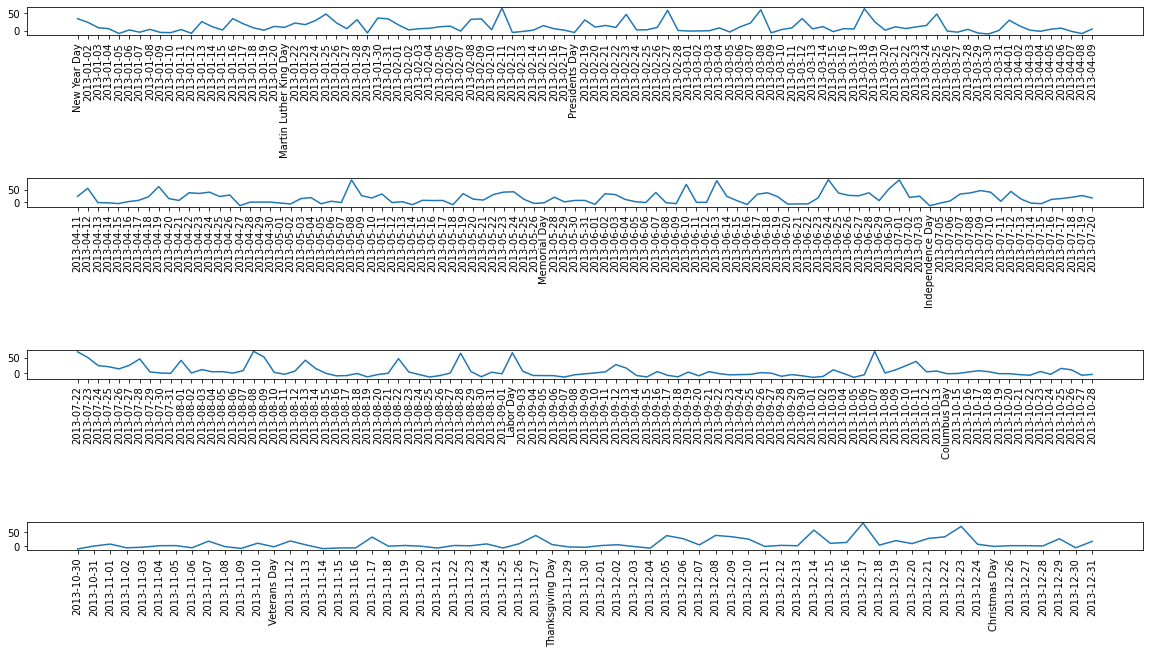

In [ ]:
plt.subplot(4,1,1)
plt.plot(l1['date'].iloc[0:99],df_avg_delay['arr_delay'].iloc[0:99])
plt.xticks(l1['date'].iloc[0:99],rotation=90,fontsize=10)
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(4,1,2)
plt.plot(l1['date'].iloc[100:201],df_avg_delay['arr_delay'].iloc[100:201])
plt.xticks(l1['date'].iloc[100:201],rotation=90,fontsize=10)
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(4,1,3)
plt.plot(l1['date'].iloc[202:301],df_avg_delay['arr_delay'].iloc[202:301])
plt.xticks(l1['date'].iloc[202:301],rotation=90,fontsize=10)
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(4,1,4)
plt.plot(l1['date'].iloc[302:],df_avg_delay['arr_delay'].iloc[302:])
plt.xticks(l1['date'].iloc[302:],rotation=90,fontsize=10)

plt.subplots_adjust(hspace=5)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [ ]:
#b. Is there a correlation between the weather datasets and daily average arrival delay? 
#Justify your answer with a statistical model (hypothesis testing)

flights_new['air_time'] = flights_new['air_time'].fillna(1)

In [ ]:
#c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?

In [ ]:
#d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) 
#and determine most and least reliables (most reliable = the one that has the shortest average delay)
df_planned.groupby('dest')['arr_delay'].mean().reset_index()

,dest,arr_delay
0,BWI,10.745552
1,DCA,9.069106
2,IAD,13.866071


Here, "IAD"=13.866071 is least reliable, "DCA"=9.069106 is most reliable

In [ ]:
#e. Calculate the average arrival delay for all the airlines and determine most and least reliables 
#(most reliable = the one that has the shortest average delay)

In [ ]:
df_planned.groupby('carrier')['arr_delay'].mean().reset_index()

,carrier,arr_delay
0,9E,3.612890
1,B6,12.805097
2,DL,-8.000000
3,EV,17.359776
4,MQ,10.995401
5,OO,3.000000
6,UA,-7.666667
7,US,5.829000
8,WN,4.915000
9,YV,18.917266


Here, "YV" : 18.917266 is least reliable, "Delta Air lines"- DA: -8.0 is most reliable

In [ ]:
#f. What day of the week we had the highest average delay?
df_planned['date']= pd.to_datetime(df_seats['date'])

In [ ]:
df_planned['Day of week']=df_planned['date'].dt.day_name()

In [ ]:
df_planned.groupby('Day of week')['arr_delay'].mean().reset_index()

,Day of week,arr_delay
0,Friday,13.068331
1,Monday,15.433646
2,Saturday,3.956917
3,Sunday,6.571429
4,Thursday,12.458195
5,Tuesday,10.414121
6,Wednesday,11.315916


"Monday" has the highest average delay of 15.433646

In [ ]:
#g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), 
#noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?

import numpy as np
df_planned['dep_time'] = df_planned['dep_time'].values.astype(np.int64)

In [ ]:
time_groups=pd.cut(df_planned['dep_time'],ordered=False,bins=[600, 1000, 1100,1400,1500,1700,1800,2200],labels=['morning','','noon','','afternoon','','evening'])

In [ ]:
df_day_timings=df_planned.groupby(time_groups)['arr_delay'].mean().reset_index()
df_day_timings.iloc[1:]

,dep_time,arr_delay
1,afternoon,18.990246
2,evening,16.761868
3,morning,-1.723660
4,noon,10.229515


Flights that took off in afternoon has the highest average delay.

In [ ]:
#h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.
df_manufacturer=flights2DCMDVA.merge(planes[['tailnum','manufacturer']],on='tailnum', how='left')

In [ ]:
(df_manufacturer['manufacturer']=='BOEING').sum()

208

In [ ]:
(df_manufacturer['manufacturer']=='EMBRAER').sum()

4606

In [ ]:
(df_manufacturer['manufacturer']=='AURBUS').sum()

0

In [ ]:
#Question/Task 4
#Build a linear regression model to estimate the arrival delay of the flights given in
#"fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, 
#what datasets (among the given datasets) to work with. In your report, please explain 
#how you build the LR model and eloborate on its accuracy.

In [ ]:
flights_test_data = pd.read_excel(r"flights_test_data.xlsx")
flights_test_data.head()

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,MQ,JFK,DCA,213
1,2013,1,25,EV,LGA,IAD,229
2,2013,2,11,MQ,JFK,DCA,213
3,2013,4,14,US,LGA,DCA,214
4,2013,4,29,EV,LGA,IAD,229


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
le= LabelEncoder()

In [ ]:
X=df_planned[['year','month','day','carrier','origin','dest','distance']]
y=df_planned[['arr_delay']]

In [ ]:
categorical_col=['carrier','origin','dest']
X[categorical_col] = X[categorical_col].apply(le.fit_transform)
y=y.fillna(y.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
flights_test_data[categorical_col]=flights_test_data[categorical_col].apply(le.fit_transform)

In [ ]:
y_pred = regressor.predict(flights_test_data)

In [ ]:
flights_test_data['arr_delay']=y_pred

In [ ]:
flights_test_data

,year,month,day,carrier,origin,dest,distance,arr_delay
0,2013,1,6,2,1,1,213,10.036488
1,2013,1,25,1,2,2,229,10.569362
2,2013,2,11,2,1,1,213,9.814313
3,2013,4,14,3,2,1,214,5.230859
4,2013,4,29,1,2,2,229,9.436220
5,2013,5,26,2,1,1,213,9.147789
6,2013,7,14,2,1,0,184,5.649179
7,2013,7,16,3,2,1,214,4.012877
8,2013,8,1,1,0,2,212,18.529374
9,2013,9,29,3,2,1,214,3.695787


In [ ]:
from sklearn import metrics
print(f"Root Mean Squared Error:{(np.sqrt(metrics.mean_squared_error(y_test.sample(20), y_pred)))/100}")

Root Mean Squared Error:0.3337090483843263


RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

In [ ]:
#sns.pairplot(flights, x_vars=['dep_time', 'dep_delay','arr_time'],y_vars='arr_delay', height=4, aspect=1, kind='scatter')
#plt.show()

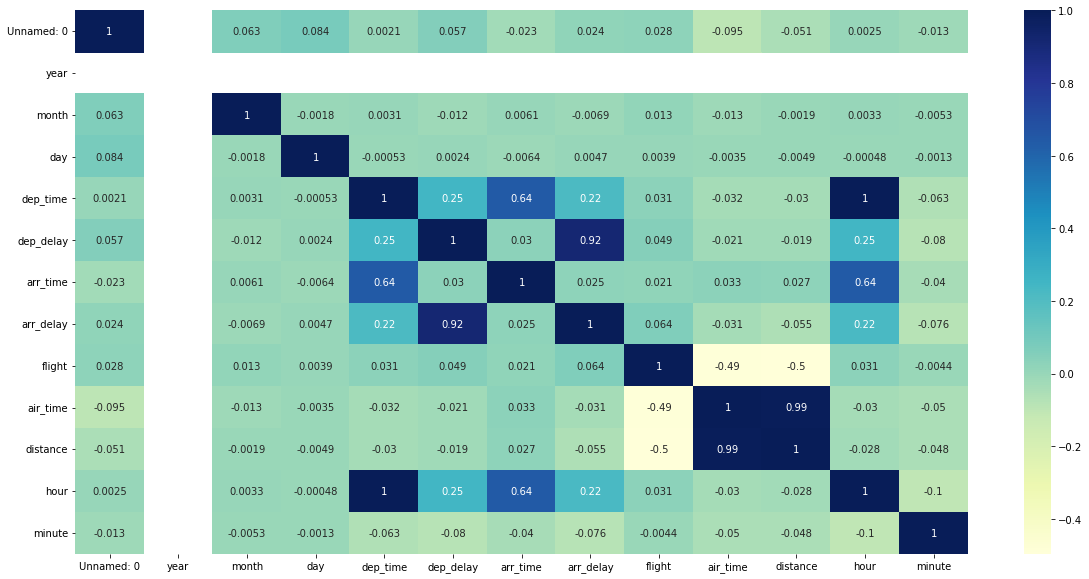

In [ ]:
sns.heatmap(flights.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
#Question/Task 5
#Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx".
#Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. 
#In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [ ]:
df_cancellations

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats,date
136,2013,1,13,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-13
137,2013,1,13,NaN,NaN,NaN,NaN,MQ,N655MQ,3944,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-13
167,2013,1,16,NaN,NaN,NaN,NaN,9E,NaN,3635,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-16
204,2013,1,20,NaN,NaN,NaN,NaN,EV,N16178,4316,EWR,BWI,NaN,169,NaN,NaN,55.0,2013-1-20
213,2013,1,21,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-1-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5712,JFK,IAD,NaN,228,NaN,NaN,55.0,2013-12-26
17116,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5736,LGA,IAD,NaN,229,NaN,NaN,55.0,2013-12-26
17147,2013,12,29,NaN,NaN,NaN,NaN,EV,N835AS,5769,LGA,IAD,NaN,229,NaN,NaN,55.0,2013-12-29
17157,2013,12,30,NaN,NaN,NaN,NaN,EV,N832AS,5714,JFK,IAD,NaN,228,NaN,NaN,55.0,2013-12-30


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df_flight_test_guess= pd.read_excel(r"flights_test_data.xlsx")

In [ ]:
X_CAN=df_cancellations[['year','month','day','carrier','origin','dest','distance']]
y_CAN=df_cancellations[['flight']]

In [ ]:
categorical_col=['carrier','origin','dest']
X_CAN[categorical_col] = X_CAN[categorical_col].apply(le.fit_transform)
y_CAN[['flight']] = y_CAN[['flight']].apply(le.fit_transform)

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_CAN, y_CAN, test_size=0.2, random_state=0)

In [ ]:
logregressor = LogisticRegression()
logregressor.fit(X_train_1, y_train_1)

In [ ]:
df_flight_test_guess[categorical_col]=df_flight_test_guess[categorical_col].apply(le.fit_transform)

In [ ]:
y_pred = logregressor.predict(df_flight_test_guess)

In [ ]:
df_flight_test_guess['flight']=y_pred

In [ ]:
df_flight_test_guess.head(3)

,year,month,day,carrier,origin,dest,distance,flight
0,2013,1,6,2,1,1,213,38
1,2013,1,25,1,2,2,229,81
2,2013,2,11,2,1,1,213,38


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_1.sample(20).to_numpy(),y_pred)

In [ ]:
print(f"Accuracy is {int(score*100)}%")

Accuracy is 5%


Accuracy of this prediction is very low.